# Logistic Regression KD Classifier

In [1]:
# Imports
import sys
sys.path.append('../') # Make parent folder visible
from preprocess import load_data
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn import linear_model
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, roc_curve

# Load data
x_train, x_test, y_train, y_test = load_data.load(one_hot=False)

In [2]:
# Feature normalization
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
# Fit Linear SVM model 
clf = linear_model.LogisticRegression()
clf.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
# Make predictions
y_pred = clf.predict(x_test) # binary prediction
y_prob = clf.predict_proba(x_test)[:,1] # predicted probabilities

In [5]:
# Evaluate predictions
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_prob))

Accuracy:  0.94701986755
Precision:  0.96
Recall:  0.975609756098
F1 Score:  0.967741935484
ROC AUC:  0.980545876887


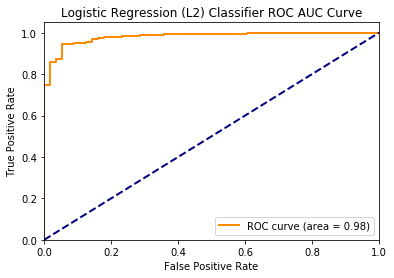

In [6]:
# Plot ROC Curve
roc = roc_curve(y_test, y_prob)
fpr, tpr, thresholds = roc
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (L2) Classifier ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

## Feature Importances/Coefficients

In [15]:
# Logistic Regression Coefficients
coefs = clf.coef_
coefs_list = coefs.tolist()[0]

In [16]:
# Get Feature Names
f = open('../data/kd_dataset.pkl','rb')
x_tr, _, _, _ = pkl.load(f)
feature_names = list(x_tr)

In [27]:
# Sort features by coefficient
feature_coefs = list(zip(feature_names, coefs_list))
feature_coefs.sort(key=lambda x: x[1], reverse=True)

In [28]:
feature_coefs

[('pggt', 1.4679647197407466),
 ('ppolys', 1.2923401513151105),
 ('redhands', 1.1583506888528166),
 ('redplt', 1.0730971661334976),
 ('zhemo', 0.8809828728831347),
 ('redeyes', 0.8768295762362645),
 ('peos', 0.864413760944106),
 ('pbands', 0.8518393790225021),
 ('pcrp', 0.6262804482840342),
 ('pesr', 0.6002507291927951),
 ('rash', 0.5787265884234769),
 ('pplts', 0.5315199670417056),
 ('clnode', 0.5233979958109649),
 ('plymphs', 0.4963078032690612),
 ('illday', 0.25271393521016877),
 ('fever', 0.0),
 ('pmonos', -0.11344403204845402),
 ('palt', -0.2955569364602172),
 ('pwbc', -0.4220553516099545),
 ('phgb', -1.7740350062840387)]